## Car price prediction with features

#### LoadData

In [97]:
import numpy as np
from matplotlib import pyplot as plt
# Features: [Age (years), Mileage (1000s km), Number of Owners]
X = np.array([
    [3, 30, 1],
    [5, 60, 2],
    [2, 20, 1],
    [7, 80, 3],
    [4, 40, 2],
    [6, 70, 2],
    [1, 10, 1],
    [8, 100, 3]
])

# Target price in ₹ lakhs
y = np.array([6.5, 5.0, 7.5, 3.5, 6.0, 4.2, 8.0, 3.0])

## Feature Scaling

mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_scaled = (X - mu) / sigma

In [41]:
def make_prediction(x, w, b):
    return np.dot(x, w) + b

In [42]:
def cost_error(x, y, w, b):
    m = x.shape[0]
    prediction = make_prediction(x, w, b)
    error = prediction - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

In [43]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    prediction = make_prediction(x, w, b)
    error = prediction - y
    dj_dw = (1 / m) * (x.T @ error)
    dj_db = (1 / m) * np.sum(error)
    return dj_dw, dj_db

In [44]:
def gradient_descent(x, y, w_init, b_init, iterations, alpha):
    w = w_init.copy()
    b = b_init
    cost_history = []

    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 100 == 0 or i == iterations - 1:
            cost = cost_error(x, y, w, b)
            cost_history.append(cost)
            print(f"iteration : {i}, Cost : {cost:.4f}, W = {w}, B = {b} ")

    return w, b, cost_history


#### Initialize the model

In [111]:
w_init = np.zeros(X.shape[1])
b_init = 0
alpha = 0.01
iterations = 1000

w_final, b_final, cost_history = gradient_descent(X_scaled, y, w_init, b_init, iterations, alpha)
predictions = make_prediction(X_scaled, w_final, b_final)

print()
print(f"prediction = {predictions}")

iteration : 0, Cost : 16.0193, W = [-0.01715738 -0.0170672  -0.01607286], B = 0.0546
iteration : 100, Cost : 1.9927, W = [-0.57539408 -0.56954567 -0.49278219], B = 3.4830
iteration : 200, Cost : 0.2897, W = [-0.62609436 -0.61563179 -0.47757145], B = 4.7380
iteration : 300, Cost : 0.0601, W = [-0.64913325 -0.63379815 -0.43987162], B = 5.1973
iteration : 400, Cost : 0.0277, W = [-0.66950855 -0.64899731 -0.40380623], B = 5.3654
iteration : 500, Cost : 0.0219, W = [-0.68860969 -0.66264175 -0.37041243], B = 5.4270
iteration : 600, Cost : 0.0200, W = [-0.70659414 -0.67491359 -0.339546  ], B = 5.4495
iteration : 700, Cost : 0.0187, W = [-0.72354894 -0.68592275 -0.31101659], B = 5.4577
iteration : 800, Cost : 0.0176, W = [-0.73955141 -0.69576771 -0.28464547], B = 5.4608
iteration : 900, Cost : 0.0167, W = [-0.75467282 -0.70453924 -0.26026744], B = 5.4619
iteration : 999, Cost : 0.0160, W = [-0.76883973 -0.71224796 -0.23794668], B = 5.4623

prediction = [6.74812898 5.04398815 7.32642042 3.58258

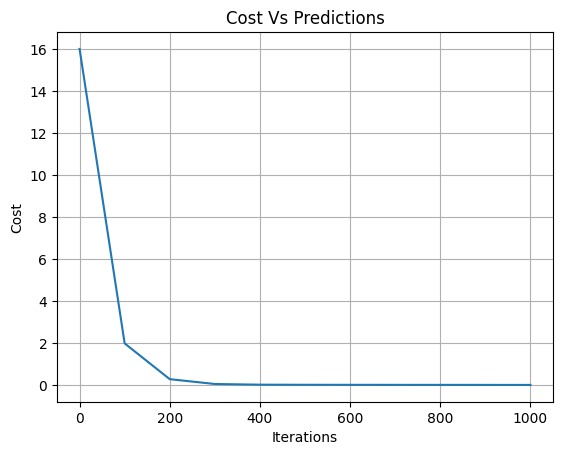

In [112]:
plt.plot(range(0, len(cost_history) * 100, 100), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Vs Predictions")
plt.grid(True)
plt.show()

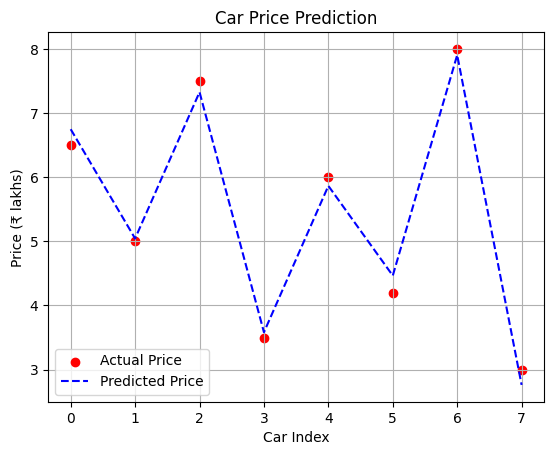

In [113]:
plt.scatter(range(len(y)), y, color='red', label='Actual Price')
plt.plot(range(len(predictions)), predictions, color='blue', linestyle='--', label='Predicted Price')
plt.title("Car Price Prediction")
plt.xlabel("Car Index")
plt.ylabel("Price (₹ lakhs)")
plt.legend()
plt.grid(True)
plt.show()